# Entrenamiento de un Modelo de Clasificación

En este notebook entrenamos un modelo de clasificación para predecir si un tumor es maligno o benigno usando el dataset procesado.


## 1. Importar librerías

In [1]:
import pandas as pd
from pathlib import Path

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")


## 2. Cargar el dataset procesado

In [2]:
ruta_procesado = Path("../data/processed/cancer_mama_procesado.csv")

if not ruta_procesado.exists():
    raise FileNotFoundError(f"No se encontró el archivo procesado en: {ruta_procesado.resolve()}")

df = pd.read_csv(ruta_procesado)
print("Datos procesados cargados correctamente")
print(df.shape)
df.head()

Datos procesados cargados correctamente
(569, 33)


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32,diagnosis_binaria
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN,1
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN,1
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN,1
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN,1
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN,1


## 3. Definir variables predictoras (X) y objetivo (y)

In [4]:
feature_cols = list(df.columns[1:11])

X = df[feature_cols]
y = df["diagnosis_binaria"]

print("Dimensiones de X:", X.shape)
print("Dimensiones de y:", y.shape)

Dimensiones de X: (569, 10)
Dimensiones de y: (569,)


## 4. Separar en train y test

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Tamaño de train:", X_train.shape[0])
print("Tamaño de test:", X_test.shape[0])

Tamaño de train: 455
Tamaño de test: 114


## 5. Crear un pipeline con escalado + Regresión Logística

In [6]:
pipeline = Pipeline(
    steps=[
        ("escalador", StandardScaler()),
        ("modelo", LogisticRegression(max_iter=1000))
    ]
)

pipeline.fit(X_train, y_train)

print("Modelo entrenado correctamente")

Modelo entrenado correctamente


## 6. Evaluación del modelo

In [7]:
y_pred = pipeline.predict(X_test)

print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

Matriz de confusión:
[[67  5]
 [ 3 39]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.96      0.93      0.94        72
           1       0.89      0.93      0.91        42

    accuracy                           0.93       114
   macro avg       0.92      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



### Visualización de la matriz de confusión

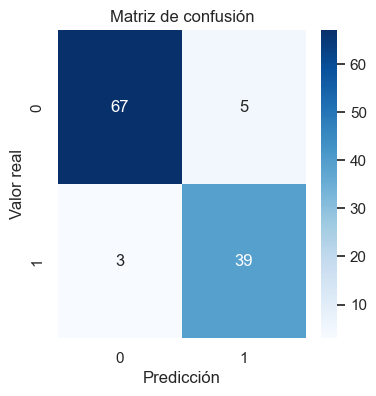

In [8]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicción")
plt.ylabel("Valor real")
plt.title("Matriz de confusión")
plt.show()

## 7. Comentarios finales

- Revisar si el modelo se comporta de forma equilibrada entre clases.
- Identificar si existen problemas de desbalance.
- Proponer posibles mejoras:
  - Probar otros modelos (Random Forest, SVM, etc.).
  - Ajustar hiperparámetros.
  - Realizar validación cruzada.

Este notebook sirve como base para explicar cómo evaluar un modelo de clasificación en un contexto de Ciencia de Datos.